## Import libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input, GlobalAveragePooling2D

## Load dataset from kaggle

In [2]:
!chmod 600 /content/kaggle.json #how to keep our api key unavailabe to others

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle # update kaggle api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 94% 305M/325M [00:08<00:00, 24.6MB/s]
100% 325M/325M [00:08<00:00, 41.7MB/s]


### Unzip the dataset

In [5]:
import zipfile

data = zipfile.ZipFile("skin-cancer-malignant-vs-benign.zip")
data.extractall()
data.close()

## Data section

In [10]:
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/test'.
There are 0 directories and 300 images in 'data/test/malignant'.
There are 0 directories and 360 images in 'data/test/benign'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 1197 images in 'data/train/malignant'.
There are 0 directories and 1440 images in 'data/train/benign'.


(224, 224, 3)


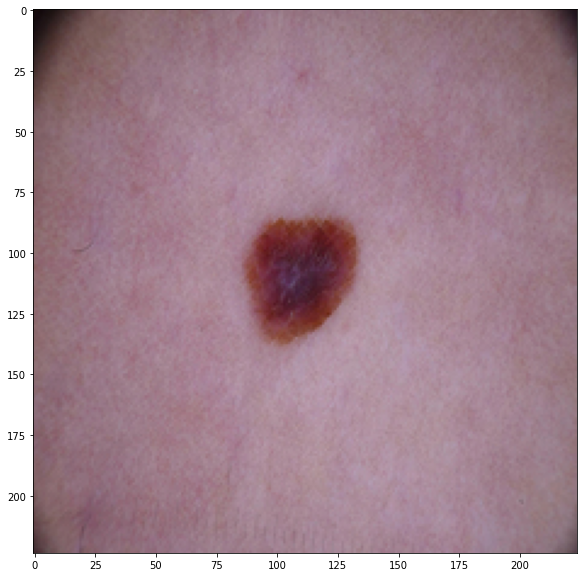

In [15]:
random_image = random.sample(os.listdir("data/train/malignant/"), 1)

plt.figure(figsize=(14,10))
img = mpimg.imread("data/train/malignant/" + random_image[0])
print(img.shape)
plt.imshow(img);

In [35]:
train_dir = 'data/train'
test_dir = 'data/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="binary",
                                                                 image_size=(224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="binary",
                                                                image_size=(224,224))

Found 2637 files belonging to 2 classes.
Found 660 files belonging to 2 classes.


## Model training

In [43]:
model = tf.keras.models.Sequential([
    Conv2D(20,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 20)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      1810      
                                                                 
 conv2d_13 (Conv2D)          (None, 107, 107, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28090)            

In [44]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(train_data,
          epochs=10,
          validation_data=test_data)

Epoch 1/10
83/83 [==============================] - 6s 54ms/step - loss: 15.4345 - accuracy: 0.6117 - val_loss: 0.7744 - val_accuracy: 0.6742
Epoch 2/10
83/83 [==============================] - 5s 52ms/step - loss: 0.6491 - accuracy: 0.7099 - val_loss: 0.5026 - val_accuracy: 0.7470
Epoch 3/10
83/83 [==============================] - 5s 60ms/step - loss: 0.4971 - accuracy: 0.7539 - val_loss: 0.5201 - val_accuracy: 0.7530
Epoch 4/10
83/83 [==============================] - 5s 57ms/step - loss: 0.4475 - accuracy: 0.7656 - val_loss: 0.4839 - val_accuracy: 0.7803
Epoch 5/10
83/83 [==============================] - 5s 58ms/step - loss: 0.3644 - accuracy: 0.8149 - val_loss: 0.4890 - val_accuracy: 0.7697
Epoch 6/10
83/83 [==============================] - 5s 57ms/step - loss: 0.3392 - accuracy: 0.8369 - val_loss: 0.5390 - val_accuracy: 0.7636
Epoch 7/10
83/83 [==============================] - 6s 66ms/step - loss: 0.3026 - accuracy: 0.8529 - val_loss: 0.4563 - val_accuracy: 0.7970
Epoch 8/10
8

In [45]:
model.evaluate(test_data)

21/21 [==============================] - 1s 41ms/step - loss: 0.5249 - accuracy: 0.8030


[0.5249253511428833, 0.8030303120613098]

**transfer learning**

In [58]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = Input(shape=(224, 224, 3), name="input_layer") 
x = base_model(inputs, training=False) 
x = GlobalAveragePooling2D(name="global_average_pooling")(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation="sigmoid", name="output_layer")(x)
model1 = tf.keras.Model(inputs, outputs)

model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 dense_10 (Dense)            (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                           

In [59]:
# Compile
model1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit
history = model1.fit(train_data,
                    epochs=10,
                    validation_data=test_data
                    )

Epoch 1/10
83/83 [==============================] - 14s 105ms/step - loss: 0.4216 - accuracy: 0.7876 - val_loss: 0.3372 - val_accuracy: 0.8364
Epoch 2/10
83/83 [==============================] - 8s 89ms/step - loss: 0.3194 - accuracy: 0.8521 - val_loss: 0.3431 - val_accuracy: 0.8333
Epoch 3/10
83/83 [==============================] - 8s 94ms/step - loss: 0.2801 - accuracy: 0.8692 - val_loss: 0.2993 - val_accuracy: 0.8621
Epoch 4/10
83/83 [==============================] - 9s 94ms/step - loss: 0.2661 - accuracy: 0.8809 - val_loss: 0.2877 - val_accuracy: 0.8606
Epoch 5/10
83/83 [==============================] - 9s 111ms/step - loss: 0.2351 - accuracy: 0.8984 - val_loss: 0.2859 - val_accuracy: 0.8697
Epoch 6/10
83/83 [==============================] - 9s 100ms/step - loss: 0.2147 - accuracy: 0.9082 - val_loss: 0.3201 - val_accuracy: 0.8773
Epoch 7/10
83/83 [==============================] - 8s 93ms/step - loss: 0.2203 - accuracy: 0.9060 - val_loss: 0.3012 - val_accuracy: 0.8652
Epoch 8/1

In [60]:
model1.evaluate(test_data)

21/21 [==============================] - 2s 72ms/step - loss: 0.3148 - accuracy: 0.8621


[0.3148214519023895, 0.8621212244033813]

In [61]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

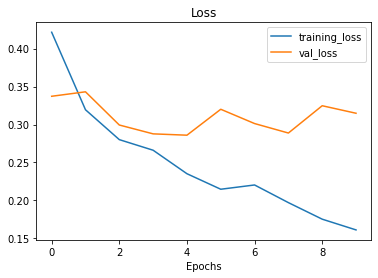

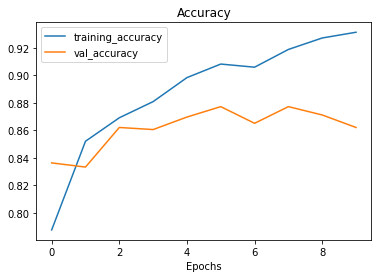

In [62]:
plot_loss_curves(history)

**save the model**

In [63]:
model1.save("skin_model.h5")